The goal here is to load the exgalm5 data for all the 6-bands and restructure them so that we have the median depths for all the filters in one file. Before that, I test whether the saved i-band depth matches that from the OSWG summary excel sheet.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import os
import pandas as pd
%matplotlib inline

In [2]:
import time
import copy
import numpy as np
import healpy as hp
import os

%matplotlib inline

In [3]:
fontsize = 18
rcparams = {}
rcparams['figure.figsize'] = (10, 6)
rcparams['axes.labelsize'] = fontsize
rcparams['legend.fontsize'] = fontsize-4
rcparams['axes.titlesize'] = fontsize
rcparams['axes.linewidth'] = 2
rcparams['axes.grid'] = True
for axis in ['x', 'y']:
    rcparams['%stick.labelsize'%axis] = fontsize-2
    rcparams['%stick.direction'%axis] = 'in'
    rcparams['%stick.major.size'%axis] = 5.5
    rcparams['%stick.minor.size'%axis] =  3.5
    rcparams['%stick.major.width'%axis] = 2
    rcparams['%stick.minor.width'%axis] = 1.5
rcparams['xtick.top'] = True
rcparams['ytick.right'] = True
for key in rcparams: mpl.rcParams[key] = rcparams[key]

In [4]:
path = '/global/cscratch1/sd/awan/lsst_output/post_wp_output_v1.4_-0.1cuts/exgalm5_data/summary_data/'
#os.listdir(path)

In [5]:
outdir = 'paper-data/exgalm5-related/'
os.makedirs(outdir, exist_ok=True)

##### read in just the i-band data first

In [6]:
yr_tags = ['y1', 'y3', 'y6', 'y10']

new_datas = {}
for yr_tag in yr_tags:
    fname = [f for f in os.listdir(path) if f.__contains__('_i-band_') and f.__contains__('_%s_' % yr_tag) and f.endswith('csv')][0]
    print('reading in %s' % fname)
    new_datas[yr_tag] = pd.read_csv('%s/%s' % (path, fname))
    print(yr_tag)

reading in median-depth_i-band_eg-pixels_y1_limi24.65_nside256.csv
y1
reading in median-depth_i-band_eg-pixels_y3_limi25.25_nside256.csv
y3
reading in median-depth_i-band_eg-pixels_y6_limi25.619999999999997_nside256.csv
y6
reading in median-depth_i-band_eg-pixels_y10_limi25.9_nside256.csv
y10


##### read in the summary data 

In [7]:
summary_data = pd.read_csv('all_metrics.csv')

In [8]:
summary_data = summary_data.drop(index=0, axis=0)

#### compare the overlapping data between the two files

look to see if all the dbs in the new data are presented in the summary data

In [9]:
for yr_tag in yr_tags:
    print('checking %s' % yr_tag)
    mapper = {'i-band depth: median': 'static_median Y%s $i$-band coadded depth in effective survey area' % yr_tag.split('y')[-1], 
          'Area (deg2)': 'static_Y%s effective survey area'  % yr_tag.split('y')[-1],
          'i-band depth: std': 'static_stddev of Y%s $i$-band coadded depth in effective survey area' % yr_tag.split('y')[-1]
         }
    
    inds = []
    for i, db in enumerate( new_datas[yr_tag]['dbname'] ):
        ind = np.where(summary_data['Unnamed: 0'] == '%s.db' % db)[0]
        inds.append(ind[0])
        for stat_key in mapper:
            #print('## "%s" vs. "%s"' % (stat_key, mapper[stat_key]))
            val1 = new_datas[yr_tag][stat_key].values[i]
            val2 = float(summary_data[mapper[stat_key]].values[ind][0])
            if val1 != val2:
                print('things dont match for %s: %s: %s vs. %s' % (db, stat_key, val1, val2))

checking y1
checking y3
checking y6
checking y10


look to see if all the dbs in the summart data are presented in the new data

In [10]:
for yr_tag in yr_tags:
    print('\nchecking %s' % yr_tag)
    mapper = {'i-band depth: median': 'static_median Y%s $i$-band coadded depth in effective survey area' % yr_tag.split('y')[-1], 
          'Area (deg2)': 'static_Y%s effective survey area'  % yr_tag.split('y')[-1],
          'i-band depth: std': 'static_stddev of Y%s $i$-band coadded depth in effective survey area' % yr_tag.split('y')[-1]
         }
    
    inds = []
    for i, db in enumerate( summary_data['Unnamed: 0'] ):
        ind = np.where(new_datas[yr_tag]['dbname'] == db.split('.db')[0])[0]
        
        if len(ind)  == 0:
            print('%s not in the new data' % db)
        
        inds.append(ind)
        for stat_key in mapper:
            #print('## "%s" vs. "%s"' % (stat_key, mapper[stat_key]))
            val1 = new_datas[yr_tag][stat_key].values[ind]
            val2 = float(summary_data[mapper[stat_key]].values[i])
            if val1 != val2:
                print('things dont match for %s: %s: %s vs. %s' % (db, stat_key, val1, val2))


checking y1
testrolling__mod2_sdf_0.20_noddf_v1.4_10yrs.db not in the new data
testrolling__mod2_sdf_0.20_v1.4_10yrs.db not in the new data
testrolling__mod3_sdf_0.20_v1.4_10yrs.db not in the new data

checking y3
testrolling__mod2_sdf_0.20_noddf_v1.4_10yrs.db not in the new data
testrolling__mod2_sdf_0.20_v1.4_10yrs.db not in the new data
testrolling__mod3_sdf_0.20_v1.4_10yrs.db not in the new data

checking y6
testrolling__mod2_sdf_0.20_noddf_v1.4_10yrs.db not in the new data
testrolling__mod2_sdf_0.20_v1.4_10yrs.db not in the new data
testrolling__mod3_sdf_0.20_v1.4_10yrs.db not in the new data

checking y10
testrolling__mod2_sdf_0.20_noddf_v1.4_10yrs.db not in the new data
testrolling__mod2_sdf_0.20_v1.4_10yrs.db not in the new data
testrolling__mod3_sdf_0.20_v1.4_10yrs.db not in the new data


/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1-v1/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


confirm that all the dbs are present for all the years, except the testrolling ones (which I couldn't find).

one more check: number of dbs for each year:

In [11]:
for yr_tag in yr_tags:
    print(yr_tag, len(new_datas[yr_tag]['dbname']))

y1 75
y3 75
y6 75
y10 75


okay things match -- good. can proceed to saving things now.

#### assemble the data to save

need to make sure that the dbs for all the bands are added in the same order for all years

In [12]:
bands = ['u', 'g', 'r', 'i', 'z', 'y']

In [13]:
data_all_yrs = {}

for yr_tag in ['y10', 'y3', 'y6', 'y1']:
    data_for_this_yr = pd.DataFrame()
    
    for i, band in enumerate( bands ):
        fname = [f for f in os.listdir(path) if f.__contains__('_%s-band_' % band) \
                                                 and f.__contains__('_%s_' % yr_tag)
                ][0]
        print('reading in %s' % fname)
        data_ = pd.read_csv('%s/%s' % (path, fname))

        band_key = '%s-band median coadded dust-corrected depth in eg-footprint' % band
        if i == 0:
            # add to the all-data dictionary
            data_for_this_yr['dbname'] = data_['dbname'].values
            data_for_this_yr['yr'] = [yr_tag] * len( data_['dbname'].values )
        else:
            # check if the order is okay
            
            if (data_for_this_yr['dbname'].values != data_['dbname'].values).any():
                print('\n## dbname order is different for %s-band vs. previous bands for %s.' % (band, yr_tag) )
                
                print('reordering ... ')
                
                # reorder things
                data_ = data_for_this_yr.merge(data_, on='dbname', suffixes=['_prev', '_%s' % yr_tag])
                
                # check to ensure the db order is the same
                print('checking the order again .. should not print anything if the order is now fine.\n')
                if  (data_for_this_yr['dbname'].values != data_['dbname'].values).any():
                    raise ValueError('somethings wrong with the db order')
                
        data_for_this_yr[band_key] = data_['%s-band depth: median' % band].values
            
    data_all_yrs[yr_tag] = data_for_this_yr

reading in median-depth_u-band_eg-pixels_y10_limi25.9_nside256.csv
reading in median-depth_g-band_eg-pixels_y10_limi25.9_nside256.csv
reading in median-depth_r-band_eg-pixels_y10_limi25.9_nside256.csv
reading in median-depth_i-band_eg-pixels_y10_limi25.9_nside256.csv
reading in median-depth_z-band_eg-pixels_y10_limi25.9_nside256.csv
reading in median-depth_y-band_eg-pixels_y10_limi25.9_nside256.csv
reading in median-depth_u-band_eg-pixels_y3_limi25.25_nside256.csv
reading in median-depth_g-band_eg-pixels_y3_limi25.25_nside256.csv
reading in median-depth_r-band_eg-pixels_y3_limi25.25_nside256.csv
reading in median-depth_i-band_eg-pixels_y3_limi25.25_nside256.csv

## dbname order is different for i-band vs. previous bands for y3.
reordering ... 
checking the order again .. should not print anything if the order is now fine.

reading in median-depth_z-band_eg-pixels_y3_limi25.25_nside256.csv
reading in median-depth_y-band_eg-pixels_y3_limi25.25_nside256.csv
reading in median-depth_u-band_

order the dbs for y1, y3, y6 as is for y10

In [14]:
y10_order = pd.DataFrame({'dbname': data_all_yrs['y10']['dbname']})
y10_order

,dbname
0,short_exp_2ns_1expt_v1.4_10yrs
1,footprint_bluer_footprintv1.4_10yrs
2,pair_strategy_0_v1.4_10yrs
3,wfd_depth_scale0.95_noddf_v1.4_10yrs
4,bulges_i_heavy_v1.4_10yrs
...,...
70,wfd_depth_scale0.85_noddf_v1.4_10yrs
71,pair_strategy_3_v1.4_10yrs
72,footprint_add_mag_cloudsv1.4_10yrs
73,wfd_depth_scale0.85_v1.4_10yrs


In [15]:
data_to_save = pd.DataFrame()
for i, yr_tag in enumerate( data_all_yrs ):
    data_all_yrs[yr_tag] = y10_order.merge(data_all_yrs[yr_tag], on='dbname')
    
    if i == 0:
        data_to_save = data_all_yrs[yr_tag]
    else:
        # stack them up
        data_to_save = data_to_save.append(data_all_yrs[yr_tag])
        
data_to_save.reset_index(inplace=True, drop=True)

In [16]:
data_to_save

,dbname,yr,u-band median coadded dust-corrected depth in eg-footprint,g-band median coadded dust-corrected depth in eg-footprint,r-band median coadded dust-corrected depth in eg-footprint,i-band median coadded dust-corrected depth in eg-footprint,z-band median coadded dust-corrected depth in eg-footprint,y-band median coadded dust-corrected depth in eg-footprint
0,short_exp_2ns_1expt_v1.4_10yrs,y10,25.44,26.65,26.79,26.30,25.60,24.81
1,footprint_bluer_footprintv1.4_10yrs,y10,25.55,27.09,26.80,26.19,25.44,24.68
2,pair_strategy_0_v1.4_10yrs,y10,25.59,26.70,26.79,26.30,25.60,24.80
3,wfd_depth_scale0.95_noddf_v1.4_10yrs,y10,25.64,26.80,26.86,26.38,25.69,24.90
4,bulges_i_heavy_v1.4_10yrs,y10,25.52,26.64,26.71,26.21,25.53,24.74
...,...,...,...,...,...,...,...,...
295,wfd_depth_scale0.85_noddf_v1.4_10yrs,y1,24.39,25.44,25.55,25.14,24.45,23.81
296,pair_strategy_3_v1.4_10yrs,y1,24.38,25.40,25.54,25.06,24.48,23.68
297,footprint_add_mag_cloudsv1.4_10yrs,y1,24.30,25.38,25.51,25.08,24.40,23.76
298,wfd_depth_scale0.85_v1.4_10yrs,y1,24.37,25.40,25.52,25.06,24.39,23.74


#### plot things out to see


## saved plot_median-depths_y1.png


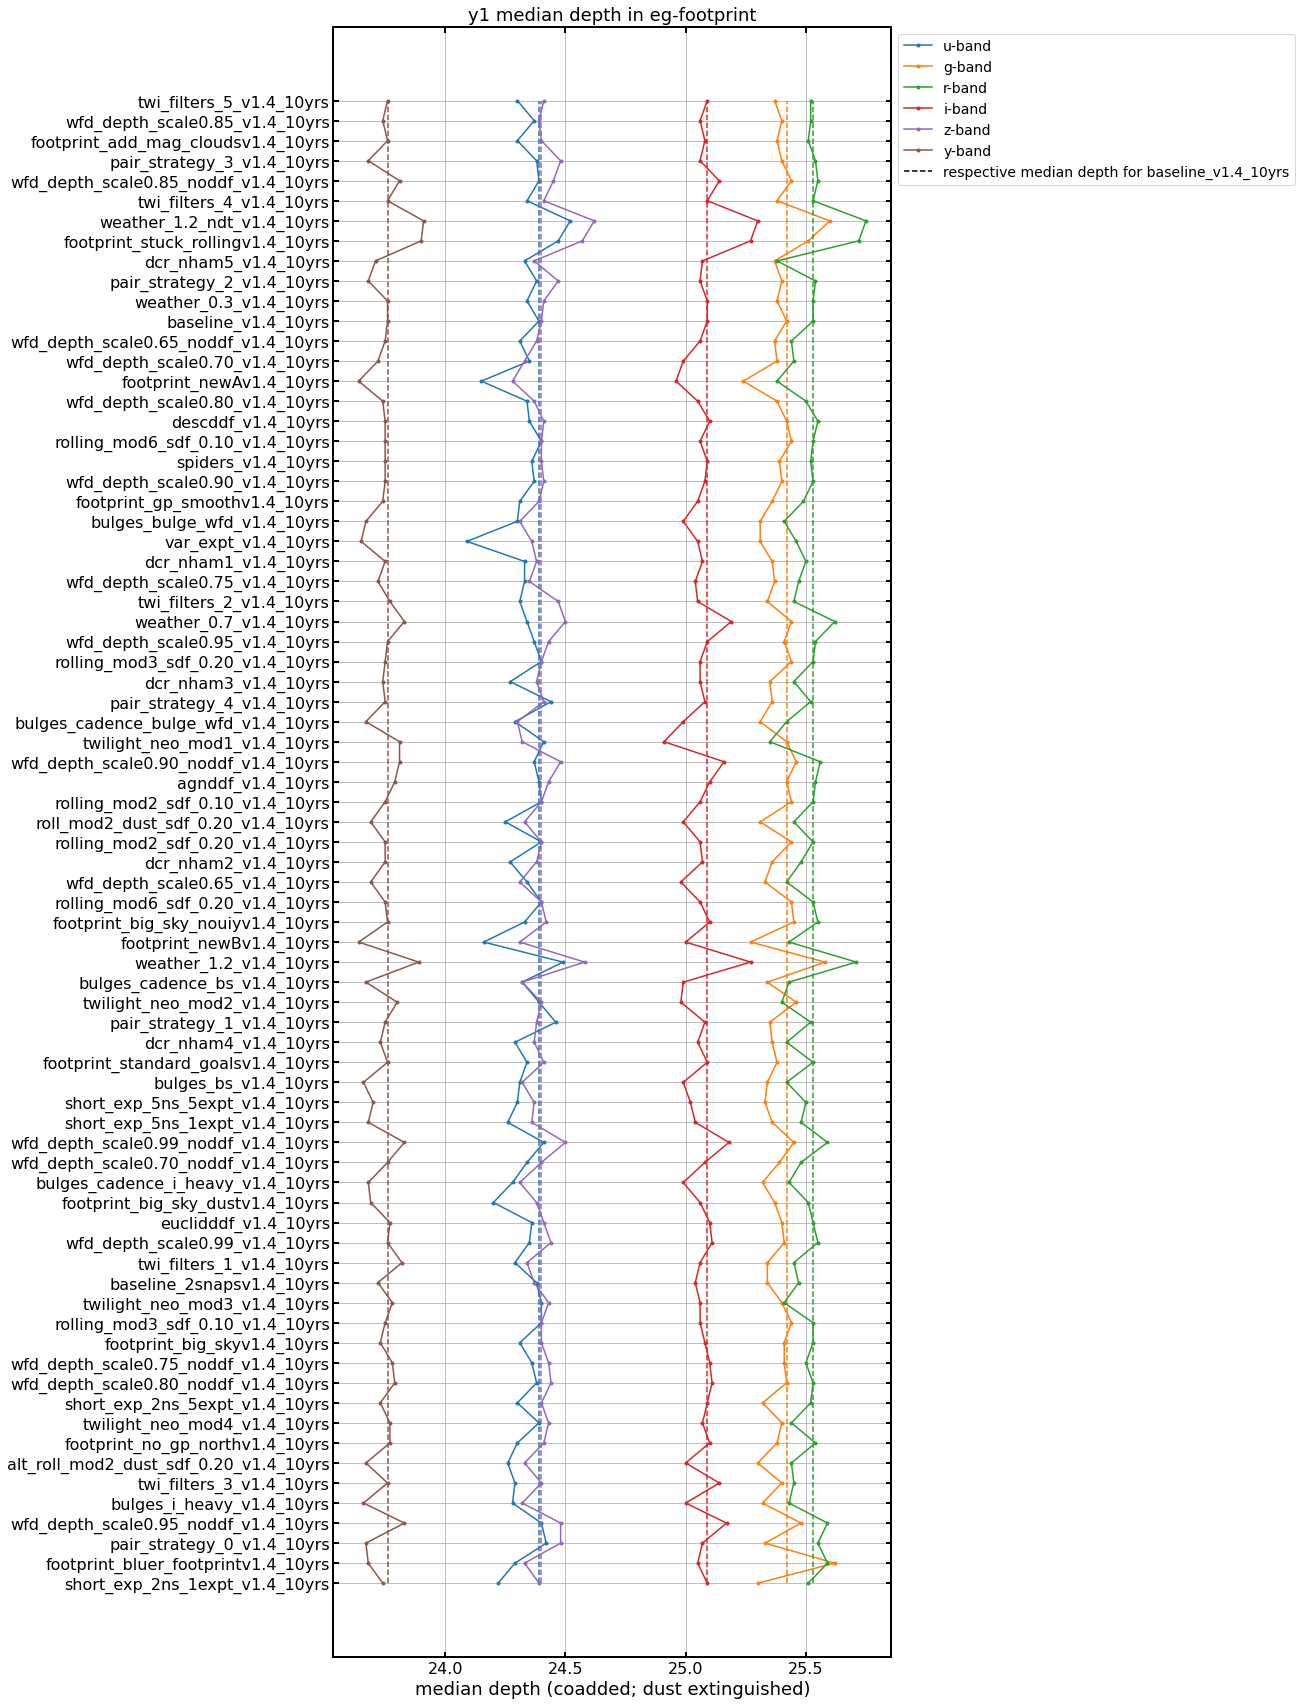

## saved plot_median-depths_y3.png


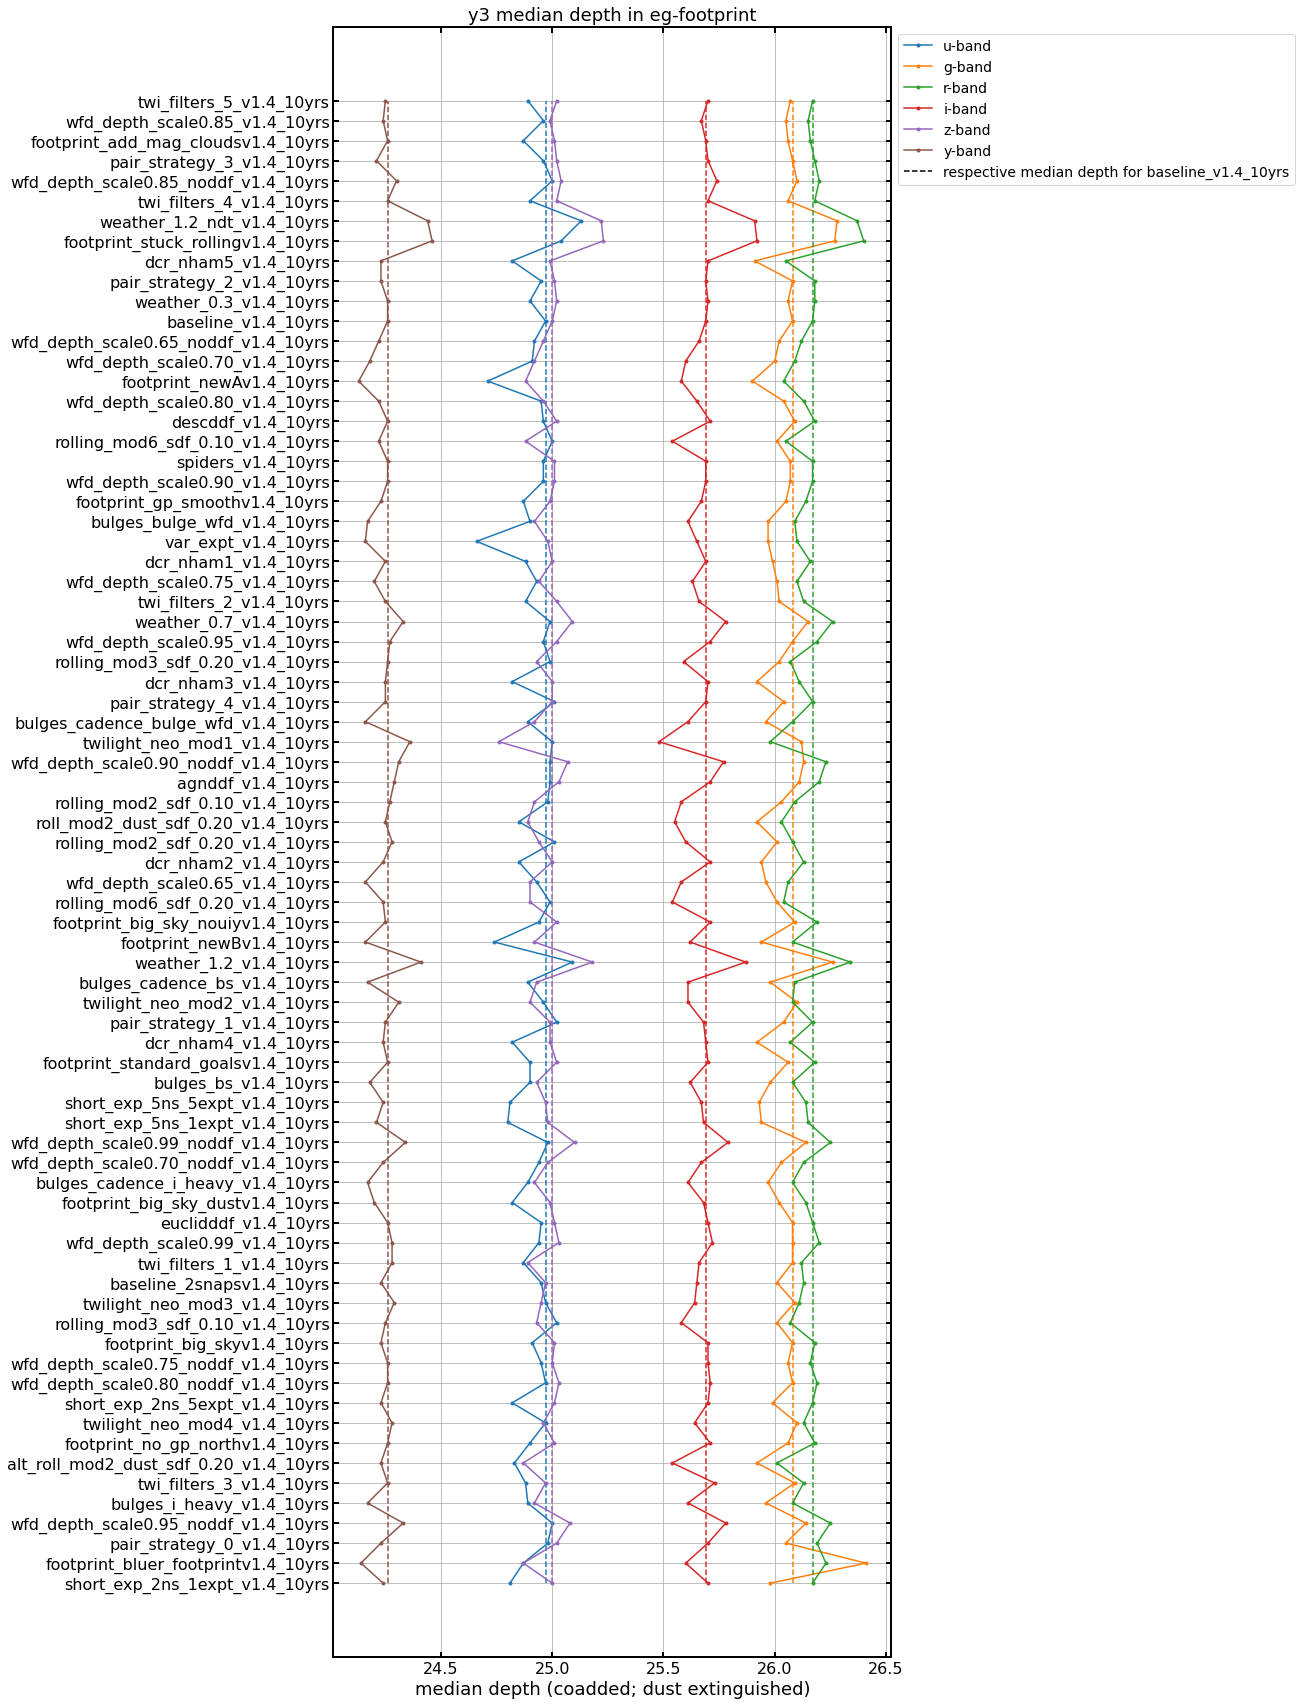

## saved plot_median-depths_y6.png


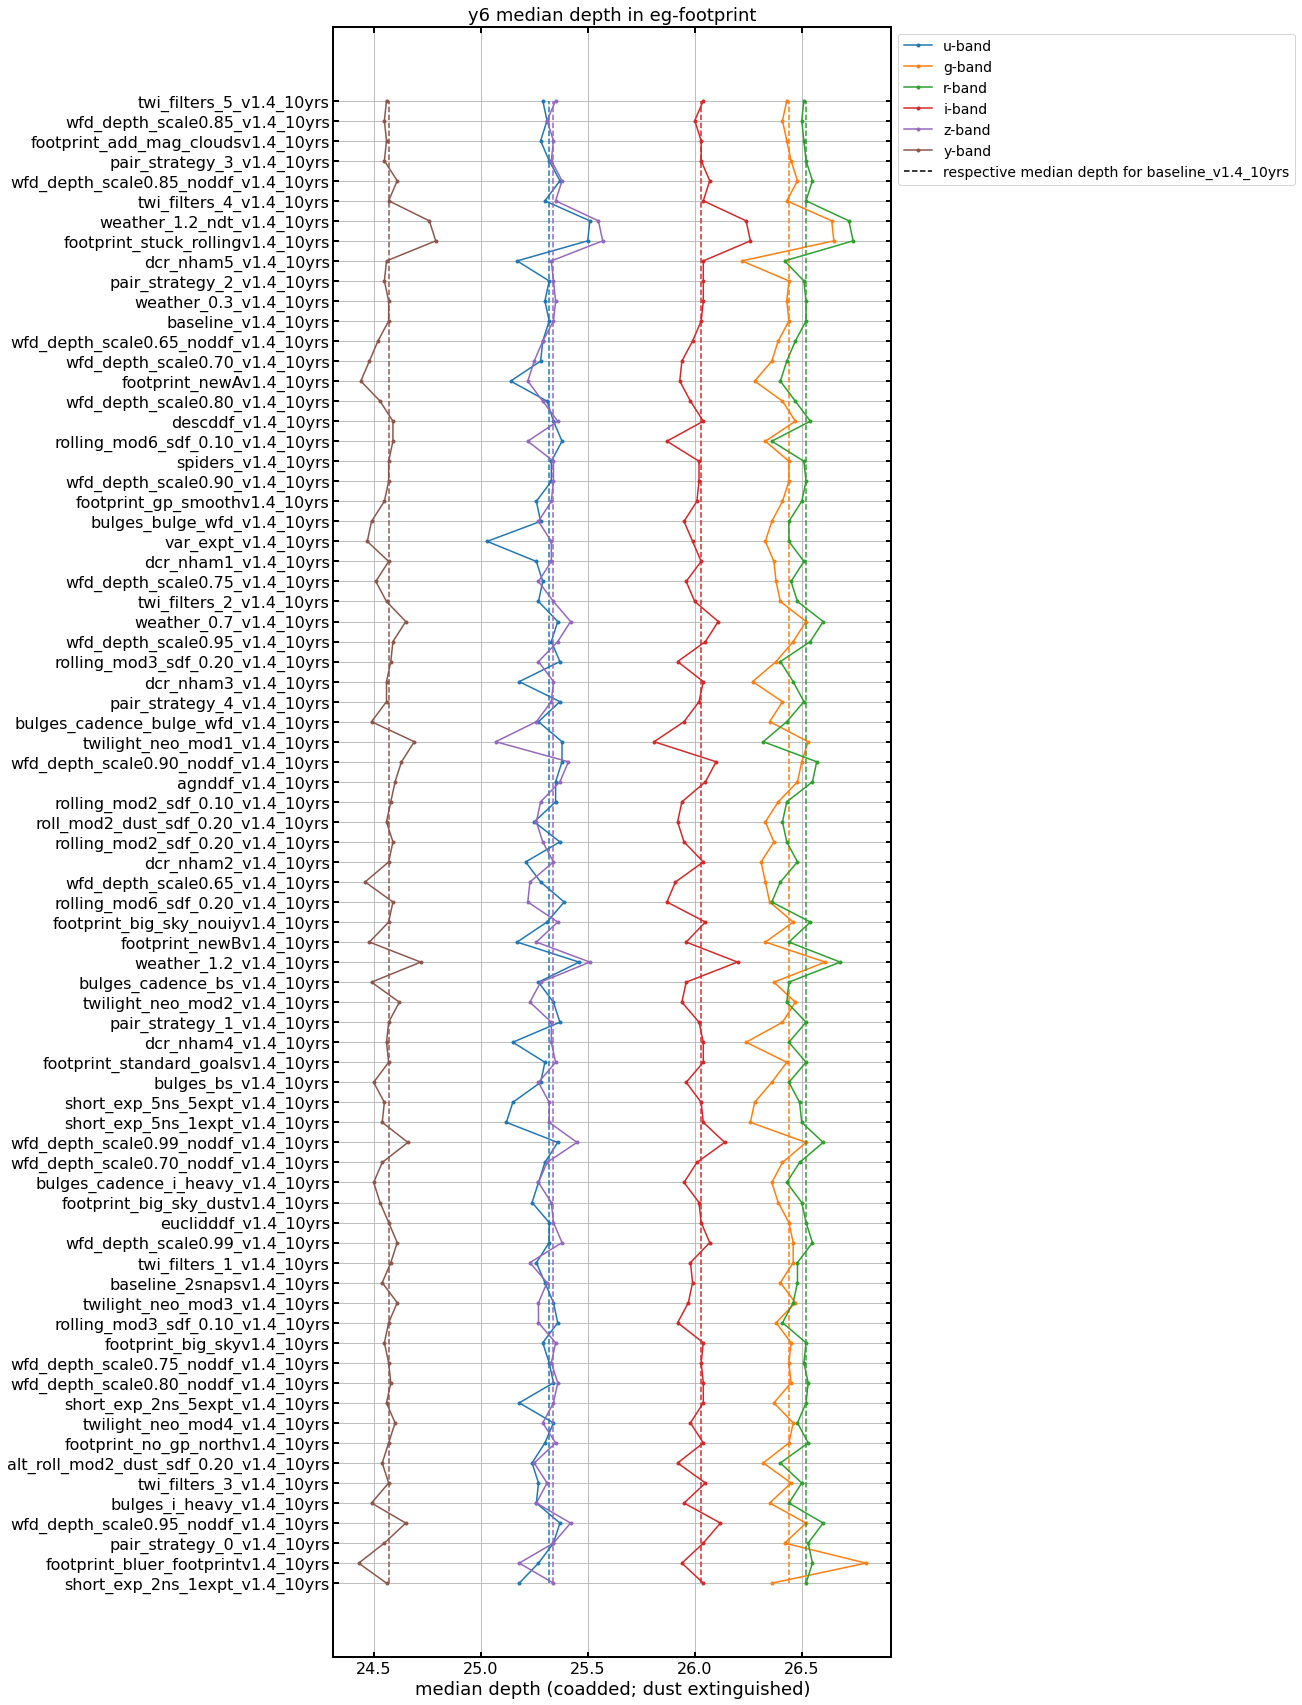

## saved plot_median-depths_y10.png


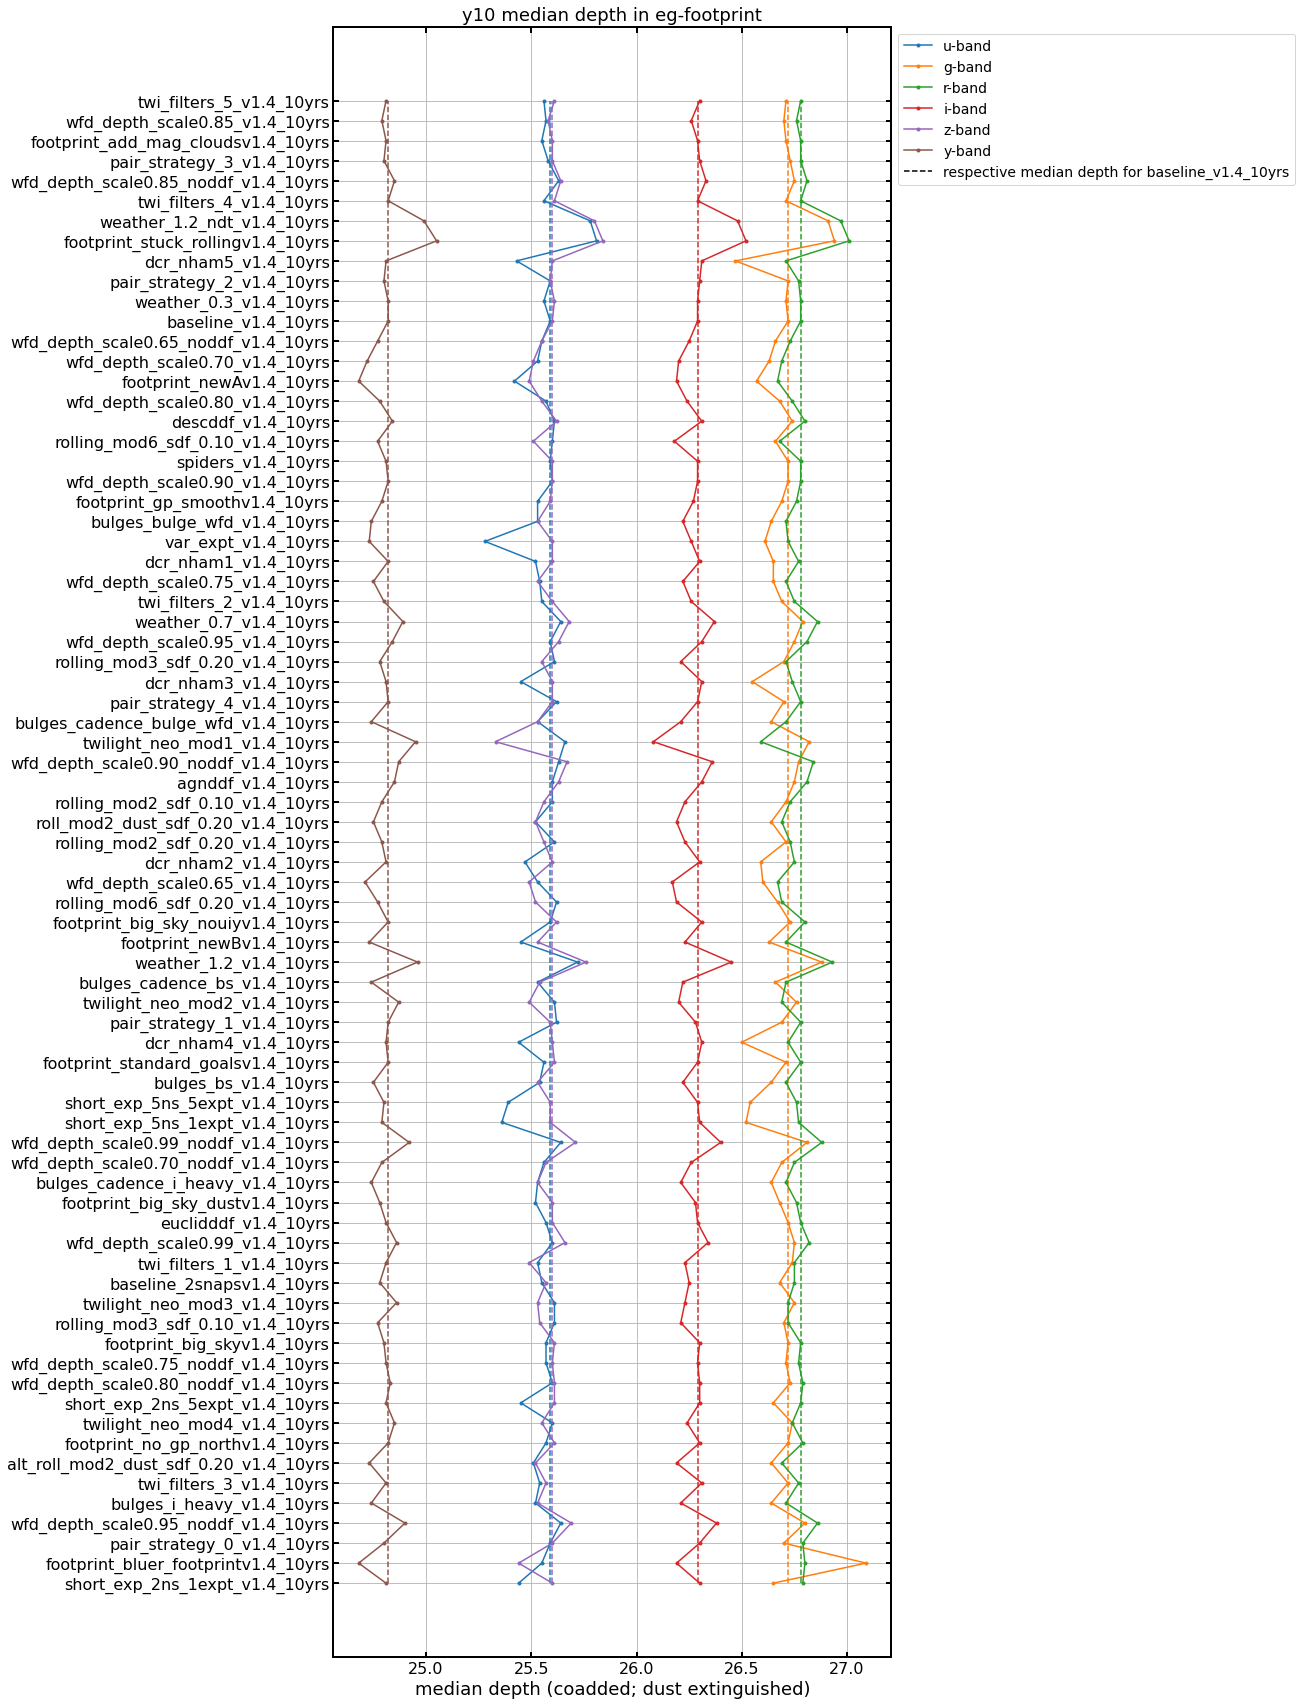

In [17]:
ndbs = len(np.where(data_to_save['yr'].values == 'y10')[0])


for yr_tag in yr_tags:
    baseline_ind = np.where( (data_to_save['yr'].values[:] == yr_tag) & (data_to_save['dbname'].values[:] == 'baseline_v1.4_10yrs') )[0]
    
    plt.clf()
    for band in bands:
        ind = np.where(data_to_save['yr'].values == yr_tag)[0]
        band_key = '%s-band median coadded dust-corrected depth in eg-footprint' % band
        p = plt.plot(data_to_save[band_key].values[ind], range(ndbs), '.-', label='%s-band' % band, )
        plt.plot( [ data_to_save[band_key].values[baseline_ind] ] * ndbs, range(ndbs), '--', color=p[0].get_color(), )

    plt.plot( [data_to_save[band_key].values[baseline_ind]], [0], 'k--', label='respective median depth for baseline_v1.4_10yrs')

    ax = plt.gca()
    ax.set_yticks( range(ndbs) )
    ax.set_yticklabels( data_to_save['dbname'].values )

    plt.xlabel('median depth (coadded; dust extinguished)')
    plt.legend(bbox_to_anchor=(1,1))
    plt.title('%s median depth in eg-footprint' % yr_tag)
    plt.gcf().set_size_inches(10, 30 )
    fname = 'plot_median-depths_%s.png' % yr_tag
    plt.savefig('%s/%s' % (outdir, fname), bbox_inches='tight', format='png')
    print('## saved %s' % fname)
    plt.show()

#### save the data

In [18]:
yrs_tag = 'y10-6-3-1'
fname = 'exgalm5-data_%sbands_%s.csv' % (len(bands), yrs_tag)
data_to_save.to_csv('%s/%s' % (outdir, fname), index=False)

##### check to confirm the new data saved for y10 matches that saved earlier

In [19]:
old = pd.read_csv('%s/exgalm5-data_6bands_y10_limi25.9.csv' % outdir)

In [20]:
for i, dbname in enumerate( old['dbname'].values ):
    ind = np.where( (data_to_save['dbname'].values == dbname) & (data_to_save['yr'].values == 'y10') )[0]
    print(i, ind)
    match = (old.values[i, :] == data_to_save.values[ind, :]).all()
    if match == False:
        print('things dont match for %s' % dbname)

0 [0]
1 [1]
2 [2]
3 [3]
4 [4]
5 [5]
6 [6]
7 [7]
8 [8]
9 [9]
10 [10]
11 [11]
12 [12]
13 [13]
14 [14]
15 [15]
16 [16]
17 [17]
18 [18]
19 [19]
20 [20]
21 [21]
22 [22]
23 [23]
24 [24]
25 [25]
26 [26]
27 [27]
28 [28]
29 [29]
30 [30]
31 [31]
32 [32]
33 [33]
34 [34]
35 [35]
36 [36]
37 [37]
38 [38]
39 [39]
40 [40]
41 [41]
42 [42]
43 [43]
44 [44]
45 [45]
46 [46]
47 [47]
48 [48]
49 [49]
50 [50]
51 [51]
52 [52]
53 [53]
54 [54]
55 [55]
56 [56]
57 [57]
58 [58]
59 [59]
60 [60]
61 [61]
62 [62]
63 [63]
64 [64]
65 [65]
66 [66]
67 [67]
68 [68]
69 [69]
70 [70]
71 [71]
72 [72]
73 [73]
74 [74]


okay good -- the dbs are in the same order as before and the values for them match between the older file and the newer one

#### extra things

#### lets plot out the stddev in depth

#### just for a sanity check: lets plot out the area values in each file; they should match.

okay good. the area values in the files are the same as they should be.